# Dendograms for pre and post corona data

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
log_returns_corona = pd.read_csv("currency_log_returns_corona.csv")
log_returns_precorona = pd.read_csv("currency_log_returns_pre_corona.csv")

In [5]:
corona = log_returns_corona.iloc[:,1:]
pre_corona = log_returns_precorona.iloc[:,1:]

In [6]:
corona.head()

,EUR/USD,JPY/USD,GBP/USD,AUD/USD,CHF/USD,CAD/USD,MXN/USD,CNY/USD,NZD/USD,SEK/USD,...,SGD/GBP,SGD/AUD,SGD/CHF,SGD/CAD,SGD/MXN,SGD/CNY,SGD/NZD,SGD/SEK,SGD/HKD,SGD/EUR
0,0.000985,0.006874,0.002811,0.014154,0.001463,-0.001349,0.013004,0.000230,0.008440,0.006711,...,-0.000288,-0.011632,0.001060,0.003871,-0.010481,0.002293,-0.005918,-0.004189,0.001288,0.001538
1,-0.004035,-0.000559,0.000701,-0.001210,0.000942,-0.005452,-0.010447,0.004826,-0.004450,-0.007385,...,0.000020,0.001932,-0.000220,0.006174,0.011169,-0.004104,0.005172,0.008107,0.000567,0.004757
2,0.006448,0.007293,0.007992,-0.001363,0.007037,0.001640,-0.014838,-0.001760,0.003974,0.005192,...,-0.008353,0.001002,-0.007398,-0.002001,0.014477,0.001399,-0.004335,-0.005553,-0.000078,-0.006809
3,0.010390,0.011800,0.005472,0.005138,0.012943,-0.001268,-0.017302,0.000981,0.008374,0.009109,...,-0.000624,-0.000290,-0.008095,0.006116,0.022150,0.003867,-0.003525,-0.004261,0.004539,-0.005542
4,0.008883,0.026850,0.006894,0.003010,0.007395,-0.007942,-0.036746,-0.002162,0.008304,-0.005282,...,-0.010225,-0.006341,-0.010726,0.004610,0.033415,-0.001169,-0.011635,0.001951,-0.003035,-0.012215


In [7]:
pre_corona.head()

,EUR/USD,JPY/USD,GBP/USD,AUD/USD,CHF/USD,CAD/USD,MXN/USD,CNY/USD,NZD/USD,SEK/USD,...,SGD/GBP,SGD/AUD,SGD/CHF,SGD/CAD,SGD/MXN,SGD/CNY,SGD/NZD,SGD/SEK,SGD/HKD,SGD/EUR
0,-0.005528,-0.001887,-0.004517,-0.005128,-0.004233,-0.003794,-0.014456,-0.000267,-0.005124,-0.007292,...,0.001577,0.002188,0.001293,0.000854,0.011516,-0.002673,0.002184,0.004352,-0.003067,0.002588
1,0.000179,0.000988,0.008177,0.002282,0.000196,0.003198,0.007558,0.000000,0.003620,0.001883,...,-0.006929,-0.001034,0.001052,-0.001949,-0.006309,0.001248,-0.002372,-0.000635,0.001401,0.001070
2,0.000983,0.003781,-0.003507,-0.003283,-0.000098,-0.001563,0.000237,-0.003928,-0.005435,-0.001413,...,0.001892,0.001667,-0.001517,-0.000052,-0.001852,0.002312,0.003820,-0.000202,-0.001628,-0.002598
3,-0.001698,0.004702,-0.003136,0.001286,-0.003530,-0.001932,-0.003419,-0.002261,-0.001970,-0.003945,...,0.002770,-0.001653,0.003164,0.001565,0.003053,0.001894,0.001603,0.003579,0.000067,0.001332
4,0.002502,0.001996,-0.002916,0.000000,0.003334,0.001040,-0.001443,-0.000929,-0.000910,0.001063,...,0.004310,0.001394,-0.001940,0.000355,0.002837,0.002324,0.002305,0.000331,0.001471,-0.001107


# Code

In [8]:
pairs = corona.columns

In [9]:
import os
os.environ["R_HOME"] = r"C:\Program Files\R\R-4.2.1" # change as needed
import rpy2
%load_ext rpy2.ipython

## Distance

### Notes: Dendograms may visually differ depending on software versions, but clusters' members are the same.

In [10]:
distance_correlations = pd.read_csv("distance_correlations_corona.csv")
distance_correlations_pre = pd.read_csv("distance_correlations_pre_corona.csv")

In [11]:
distance_correlations=distance_correlations.iloc[:,1:]
distance_correlations_pre=distance_correlations_pre.iloc[:,1:]

### Corona

C:\Users\Vinh\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


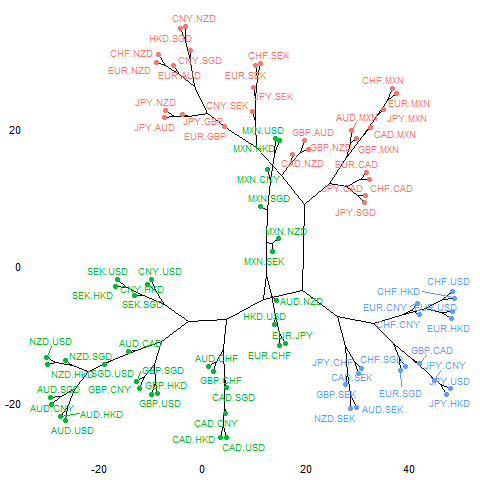

In [12]:
%%R -i distance_correlations

library("factoextra")

dist_corr_dist <- dist(t(as.matrix(1-distance_correlations)), method="euclidean")
tree_corr_dist <- hclust(dist_corr_dist, method="complete")
fviz_dend(tree_corr_dist,type="phylogenic", repel=TRUE, k = 3)

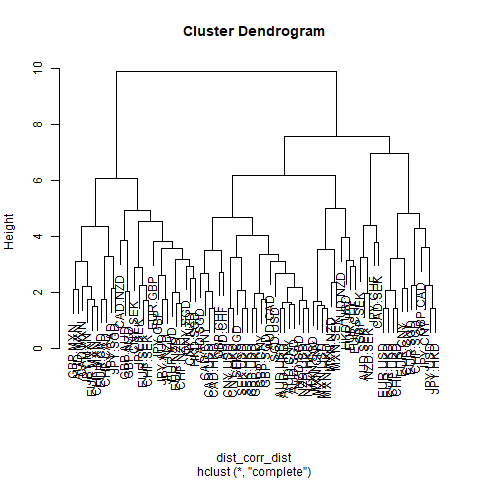

In [13]:
%%R

plot(tree_corr_dist)

In [14]:
%%R -o groups
groups <- cutree(tree_corr_dist, 3)

In [16]:
clusters_dist = pd.DataFrame()
clusters_dist["Pairs"] = distance_correlations.columns
clusters_dist["Clusters_Post"] = np.array(groups)

### Pre Corona

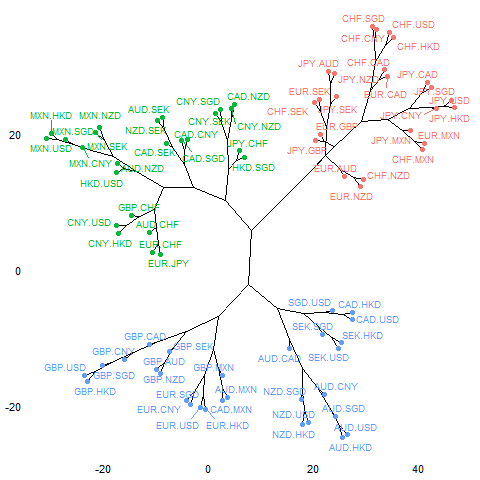

In [18]:
%%R -i distance_correlations_pre

dist_corr_dist_pre <- dist(t(as.matrix(1-distance_correlations_pre)), method="euclidean")
tree_corr_dist_pre <- hclust(dist_corr_dist_pre, method="complete")
fviz_dend(tree_corr_dist_pre,type="phylogenic", repel=TRUE, k = 3)

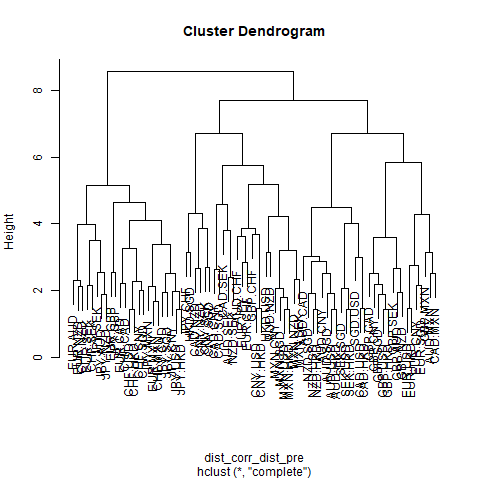

In [19]:
%%R

plot(tree_corr_dist_pre)

In [20]:
%%R -o groups
groups <- cutree(tree_corr_dist_pre, 3)

In [21]:
clusters_dist_pre = pd.DataFrame()
clusters_dist_pre["Pairs"] = distance_correlations_pre.columns
clusters_dist_pre["Clusters_Pre"] = np.array(groups)

In [22]:
clusters_final = clusters_dist.copy()
clusters_final["Clusters_Pre"] = clusters_dist_pre["Clusters_Pre"]

In [24]:
d1 = {'Currency': ['USD','EUR','JPY','GBP','CAD','MXN','NZD','SEK','CHF','CNY','HKD','SGD', 'AUD'],
     'Interest Rate Pre COVID': [0.019136, -0.003869, 0.000237, 0.007509, 0.018, 0.0789, 
                                 0.012627, -0.003527, -0.007342, .0427, .023, .0155, .01183],
     'Interest Rate Post COVID': [0.002618, -0.004510, -0.00053, 0.001455, 0.002743, .05012, 
                                  0.00289, -0.0013, -0.007219, .0396, .0086, .00305, .00892]}
interest_rates = pd.DataFrame(d1)


In [26]:
left = []
right = []

In [27]:
for pair in np.array(clusters_final["Pairs"]):
    left.append(pair[:3])
    right.append(pair[4:])

In [37]:
unique = np.unique(np.concatenate((np.array(left), np.array(right))))
unique

array(['AUD', 'CAD', 'CHF', 'CNY', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN',
       'NZD', 'SEK', 'SGD', 'USD'], dtype='<U3')

In [30]:
clusters_final["Left Avg Interest Rate [Pre]"] = np.ones(len(clusters_final))
clusters_final["Right Avg Interest Rate [Pre]"] = np.ones(len(clusters_final))
clusters_final["Left Avg Interest Rate [Post]"] = np.ones(len(clusters_final))
clusters_final["Right Avg Interest Rate [Post]"] = np.ones(len(clusters_final))
clusters_final["Left Currency"] = np.array(left)
clusters_final["Right Currency"] = np.array(right)

In [38]:
for currency in unique:
    clusters_final.loc[clusters_final["Left Currency"] == currency, "Left Avg Interest Rate [Pre]"] = \
    float(interest_rates[interest_rates["Currency"] == currency].loc[:,"Interest Rate Pre COVID"])
    clusters_final.loc[clusters_final["Right Currency"] == currency, "Right Avg Interest Rate [Pre]"] = \
    float(interest_rates[interest_rates["Currency"] == currency].loc[:,"Interest Rate Pre COVID"])
    
    clusters_final.loc[clusters_final["Left Currency"] == currency,"Left Avg Interest Rate [Post]"] = \
    float(interest_rates[interest_rates["Currency"] == currency].loc[:,"Interest Rate Post COVID"])
    clusters_final.loc[clusters_final["Right Currency"] == currency,"Right Avg Interest Rate [Post]"] = \
    float(interest_rates[interest_rates["Currency"] == currency].loc[:,"Interest Rate Post COVID"])

In [43]:
clusters_final["Interest Rate Diff [Pre]"] = clusters_final["Left Avg Interest Rate [Pre]"] - clusters_final["Right Avg Interest Rate [Pre]"]
clusters_final["Interest Rate Diff [Post]"] = clusters_final["Left Avg Interest Rate [Post]"] - clusters_final["Right Avg Interest Rate [Post]"]
# if negative, meaning left < right, left is funding, and right is investment
# if positive, meaning left > right, left is investment, and right is funding

In [44]:
clusters_final

,Pairs,Clusters_Post,Clusters_Pre,Left Avg Interest Rate [Pre],Right Avg Interest Rate [Pre],Left Avg Interest Rate [Post],Right Avg Interest Rate [Post],Left Currency,Right Currency,Interest Rate Diff [Pre],Interest Rate Diff [Post]
0,EUR/USD,1,1,-0.003869,0.019136,-0.004510,0.002618,EUR,USD,-0.023005,-0.007128
1,JPY/USD,1,2,0.000237,0.019136,-0.000530,0.002618,JPY,USD,-0.018899,-0.003148
2,GBP/USD,2,1,0.007509,0.019136,0.001455,0.002618,GBP,USD,-0.011627,-0.001163
3,AUD/USD,2,1,0.011830,0.019136,0.008920,0.002618,AUD,USD,-0.007306,0.006302
4,CHF/USD,1,2,-0.007342,0.019136,-0.007219,0.002618,CHF,USD,-0.026478,-0.009837
...,...,...,...,...,...,...,...,...,...,...,...
73,NZD/HKD,2,1,0.012627,0.023000,0.002890,0.008600,NZD,HKD,-0.010373,-0.005710
74,NZD/SGD,2,1,0.012627,0.015500,0.002890,0.003050,NZD,SGD,-0.002873,-0.000160
75,SEK/HKD,2,1,-0.003527,0.023000,-0.001300,0.008600,SEK,HKD,-0.026527,-0.009900
76,SEK/SGD,2,1,-0.003527,0.015500,-0.001300,0.003050,SEK,SGD,-0.019027,-0.004350


In [45]:
clusters_final[clusters_final["Clusters_Pre"] == 1]

,Pairs,Clusters_Post,Clusters_Pre,Left Avg Interest Rate [Pre],Right Avg Interest Rate [Pre],Left Avg Interest Rate [Post],Right Avg Interest Rate [Post],Left Currency,Right Currency,Interest Rate Diff [Pre],Interest Rate Diff [Post]
0,EUR/USD,1,1,-0.003869,0.019136,-0.004510,0.002618,EUR,USD,-0.023005,-0.007128
2,GBP/USD,2,1,0.007509,0.019136,0.001455,0.002618,GBP,USD,-0.011627,-0.001163
3,AUD/USD,2,1,0.011830,0.019136,0.008920,0.002618,AUD,USD,-0.007306,0.006302
5,CAD/USD,2,1,0.018000,0.019136,0.002743,0.002618,CAD,USD,-0.001136,0.000125
8,NZD/USD,2,1,0.012627,0.019136,0.002890,0.002618,NZD,USD,-0.006509,0.000272
9,SEK/USD,2,1,-0.003527,0.019136,-0.001300,0.002618,SEK,USD,-0.022663,-0.003918
11,SGD/USD,2,1,0.015500,0.019136,0.003050,0.002618,SGD,USD,-0.003636,0.000432
18,EUR/CNY,1,1,-0.003869,0.042700,-0.004510,0.039600,EUR,CNY,-0.046569,-0.044110
21,EUR/HKD,1,1,-0.003869,0.023000,-0.004510,0.008600,EUR,HKD,-0.026869,-0.013110
22,EUR/SGD,1,1,-0.003869,0.015500,-0.004510,0.003050,EUR,SGD,-0.019369,-0.007560


In [41]:
clusters_final[clusters_final["Clusters_Pre"] == 2]

,Pairs,Clusters_Post,Clusters_Pre,Left Avg Interest Rate [Pre],Right Avg Interest Rate [Pre],Left Avg Interest Rate [Post],Right Avg Interest Rate [Post],Left Currency,Right Currency
1,JPY/USD,1,2,0.000237,0.019136,-0.000530,0.002618,JPY,USD
4,CHF/USD,1,2,-0.007342,0.019136,-0.007219,0.002618,CHF,USD
13,EUR/GBP,3,2,-0.003869,0.007509,-0.004510,0.001455,EUR,GBP
14,EUR/AUD,3,2,-0.003869,0.011830,-0.004510,0.008920,EUR,AUD
16,EUR/CAD,3,2,-0.003869,0.018000,-0.004510,0.002743,EUR,CAD
17,EUR/MXN,3,2,-0.003869,0.078900,-0.004510,0.050120,EUR,MXN
19,EUR/NZD,3,2,-0.003869,0.012627,-0.004510,0.002890,EUR,NZD
20,EUR/SEK,3,2,-0.003869,-0.003527,-0.004510,-0.001300,EUR,SEK
23,JPY/GBP,3,2,0.000237,0.007509,-0.000530,0.001455,JPY,GBP
24,JPY/AUD,3,2,0.000237,0.011830,-0.000530,0.008920,JPY,AUD


In [42]:
clusters_final[clusters_final["Clusters_Pre"] == 3]

,Pairs,Clusters_Post,Clusters_Pre,Left Avg Interest Rate [Pre],Right Avg Interest Rate [Pre],Left Avg Interest Rate [Post],Right Avg Interest Rate [Post],Left Currency,Right Currency
6,MXN/USD,2,3,0.078900,0.019136,0.050120,0.002618,MXN,USD
7,CNY/USD,2,3,0.042700,0.019136,0.039600,0.002618,CNY,USD
10,HKD/USD,2,3,0.023000,0.019136,0.008600,0.002618,HKD,USD
12,EUR/JPY,2,3,-0.003869,0.000237,-0.004510,-0.000530,EUR,JPY
15,EUR/CHF,2,3,-0.003869,-0.007342,-0.004510,-0.007219,EUR,CHF
25,JPY/CHF,1,3,0.000237,-0.007342,-0.000530,-0.007219,JPY,CHF
34,GBP/CHF,2,3,0.007509,-0.007342,0.001455,-0.007219,GBP,CHF
42,AUD/CHF,2,3,0.011830,-0.007342,0.008920,-0.007219,AUD,CHF
46,AUD/NZD,2,3,0.011830,0.012627,0.008920,0.002890,AUD,NZD
47,AUD/SEK,1,3,0.011830,-0.003527,0.008920,-0.001300,AUD,SEK


In [ ]:
clusters_final[clusters_final["Clusters_Post"] == 1]

In [ ]:
clusters_final[clusters_final["Clusters_Post"] == 2]

In [ ]:
clusters_final[clusters_final["Clusters_Post"] == 3]